# Hitansh Agarwal
## Reg No.: 230957218
## Roll No.: 73
### Week 6
#### Exercise 1

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df = df.dropna(subset=["Review Text"])

reviews_count = df['Clothing ID'].value_counts()
df = df[df['Clothing ID'].isin(reviews_count[reviews_count >= 5].index)]

In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\b(can't|cannot)\b", "can not", text)
    text = re.sub(r"\b(n't)\b", " not", text)
    text = re.sub(r"\b(i'm)\b", "i am", text)
    text = re.sub(r"\b('re)\b", " are", text)
    text = re.sub(r"\b('s)\b", " is", text)
    text = re.sub(r"\b('ll)\b", " will", text)
    text = re.sub(r"\b('ve)\b", " have", text)
    text = re.sub(r"\b('d)\b", " would", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text

df["Cleaned Review"] = df["Review Text"].astype(str).apply(clean_text)

In [5]:
X = df["Cleaned Review"]
y = df["Recommended IND"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred = nb_classifier.predict(X_test_tfidf)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8170
Recall: 1.0000
F1 Score: 0.8993


#### Exercise 2

In [19]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("cancer.csv")
df.head()

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.Female.< 18,Rates.Age and Sex.Male.< 18,...,Types.Lung.Age and Sex.Male.45 - 64,Types.Lung.Age and Sex.Female.> 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,102.9,221.7,457.4,59.9,60.4,52.6,52.8,23.0,22.9,14.8
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,50.3,268.3,335.0,48.7,49.5,45.6,47.9,33.0,74.4,0.0
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,47.0,191.9,275.8,39.5,42.2,38.2,40.4,21.3,11.1,21.6
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,106.5,248.7,484.7,63.4,64.2,62.9,63.0,18.1,16.2,14.6
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,36.8,192.5,269.0,37.2,42.6,46.5,48.6,25.8,18.4,18.3


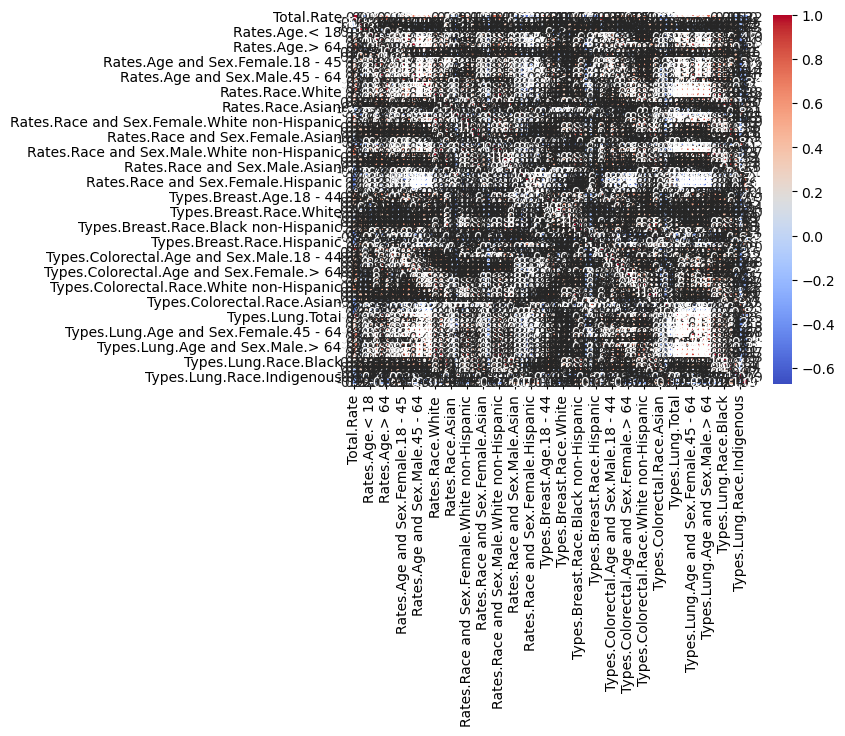

In [35]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [36]:
if 'Total.Rate' in df.columns:
    threshold = df['Total.Rate'].quantile(0.75)
    df['Target'] = (df['Total.Rate'] > threshold).astype(int)
else:
    raise KeyError("'Total.Rate' column not found in dataset.")

In [37]:
selected_features = [
    'Rates.Age.< 18', 'Rates.Age.18-45', 'Rates.Age.45-64', 'Rates.Age.> 64',
    'Types.Lung.Race.White', 'Types.Lung.Race.Black', 'Types.Lung.Race.Hispanic'
]

selected_features = [feat for feat in selected_features if feat in df.columns]
X = df[selected_features]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    
    print(f"{name} Results:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}\n")

GaussianNB Results:
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000

MultinomialNB Results:
Precision: 0.7500
Recall: 0.7500
F1 Score: 0.7500
AUC-ROC: 0.8036

BernoulliNB Results:
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.4286

